# Hospital Data Visualization 6

## Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import chardet
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# Library for modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
pd.set_option('display.max_columns', None)
# Library to see the training models
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings('ignore')
# look at the first ten thousand bytes to guess the character encoding
with open('06.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## Reading the Data

In [2]:
df=pd.read_csv('06.csv',encoding='ISO-8859-1',sep=';')

In [3]:
df.head(15)

PATIENT ID DIA_PPAL   DIA_02  DIA_03  DIA_04   DIA_05   DIA_06   DIA_08  \
0         2293    J18.9  Z20.828  R68.89  R09.02    D80.0      NaN      NaN   
1         2287   J12.89   B97.29  M19.90   F32.9   G25.81   M51.86    Z96.1   
2         2269    J18.9   R68.89  J96.90     I10      NaN      NaN      NaN   
3         2265   J12.89   B97.29  J96.00  J84.89   Z99.89    Z95.0      NaN   
4         2264    J47.0   J12.89  B97.29   J47.1      I10    E11.9  Z87.891   
5         2262    J98.8   B97.29  J96.90   N17.9    E78.5      I10    E11.9   
6         2260    J47.0   J12.89  B97.29   J44.0  J45.901   J96.90    N17.9   
7         2259    J18.9   R68.89  J96.90  I26.99    M81.0    Z88.8  Z87.891   
8         2257   J12.89   B97.29  J96.20   I13.0   I50.30    N18.9    E11.9   
9         2256    J12.9   R68.89   I12.9   N18.9    E78.5    E79.0   F02.80   
10        2255    J18.9      I10   E78.5   N40.0   R68.89      NaN      NaN   
11        2254    J18.9   R09.02  K80.20  E66.01   Z68.43   R68.89      NaN   
12        2253   J12.89   E11.65  B97.29     I10    E78.5  Z86.018      NaN   
13        2252    N39.0      I10   E03.9  G31.84    Z95.0   Z79.82      NaN   
14        2248   J12.89   B97.29  J96.00     I10    E78.5    E11.9   I25.10   

    DIA_07  DIA_09  DIA_10  DIA_11  DIA_12 DIA_13  DIA_14  DIA_15  DIA_16  \
0      NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
1   Z98.49   Z60.2     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
3   Z79.52     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
4    K44.9  Z98.52  Z79.51     NaN     NaN    NaN     NaN     NaN     NaN   
5    G30.9   K44.9  Z90.49   Z59.3  Z79.82  Z88.6     NaN     NaN     NaN   
6    J31.0   E87.0   E87.5   I11.0   I50.9  E11.9   E78.5   E66.9  G47.33   
7   M41.85     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
8      I43   E78.5   E66.9   I48.1  Z77.22  Z79.4  Z79.01  Z99.81     NaN   
9    G30.9  I65.23   Z88.6   Z88.2     R99    NaN     NaN     NaN     NaN   
10     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
11     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
12  Z79.84     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
13     NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
14  G31.84   Z95.5  Z79.01  Z79.84     NaN    NaN     NaN     NaN     NaN   

     DIA_17 DIA_18  DIA_19 NEO_01 NEO_02 NEO_03 NEO_04  NEO_05  NEO_06  \
0       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
1       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
2       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
3       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
4       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
5       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
6   Z86.711  E26.9  Z86.73    NaN    NaN    NaN    NaN     NaN     NaN   
7       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
8       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
9       NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
10      NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
11      NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
12      NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
13      NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   
14      NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN     NaN   

   POAD_02 POAD_03 POAD_04 POAD_05 POAD_06 POAD_07 POAD_08 POAD_09 POAD_10  \
0        S       S       S       S     NaN     NaN     NaN     NaN     NaN   
1        S       S       S       S       S       E       S       S     NaN   
2        S       S       S     NaN     NaN     NaN     NaN     NaN     NaN   
3        

## Checking the Data

In [4]:
df.describe()

PATIENT ID  NEO_05  NEO_06
count  1775.000000     0.0     0.0
mean   1143.154366     NaN     NaN
std     654.523602     NaN     NaN
min       1.000000     NaN     NaN
25%     601.500000     NaN     NaN
50%    1119.000000     NaN     NaN
75%    1674.500000     NaN     NaN
max    2293.000000     NaN     NaN

In [5]:
df.shape

(1775, 65)

In [6]:
#Values NaN
df.isnull().sum().sort_values(ascending=False)

NEO_05        1775
NEO_06        1775
NEO_04        1774
PROC_19       1770
PROC_20       1770
NEO_03        1769
PROC_18       1767
PROC_17       1764
PROC_16       1754
PROC_15       1742
NEO_02        1739
PROC_14       1735
DIA_19        1725
POAD_19       1725
PROC_13       1719
POAD_18       1714
DIA_18        1714
POAD_17       1692
DIA_17        1692
PROC_12       1688
DIA_16        1665
POAD_16       1665
NEO_01        1664
DIA_15        1635
POAD_15       1635
PROC_11       1629
DIA_14        1586
POAD_14       1586
PROC_10       1558
DIA_13        1525
              ... 
DIA_11        1389
POAD_10       1288
DIA_10        1288
PROC_08       1212
POAD_09       1172
DIA_09        1172
DIA_08        1049
POAD_08       1049
PROC_07        931
POAD_07        882
DIA_07         882
POAD_06        718
DIA_06         718
PROC_06        620
DIA_05         528
POAD_05        528
POAD_04        335
DIA_04         335
PROC_05        329
POAD_03        141
DIA_03         141
PROC_04     

Vemos que hay demasiados missing values por lo no podemos optar por rellenarlo, por lo que visualizamos directamente por número de ocurrencias.

In [7]:
# % Values NaN
df.isnull().sum().sort_values(ascending=False)/len(df.index)*100

NEO_05        100.000000
NEO_06        100.000000
NEO_04         99.943662
PROC_19        99.718310
PROC_20        99.718310
NEO_03         99.661972
PROC_18        99.549296
PROC_17        99.380282
PROC_16        98.816901
PROC_15        98.140845
NEO_02         97.971831
PROC_14        97.746479
DIA_19         97.183099
POAD_19        97.183099
PROC_13        96.845070
POAD_18        96.563380
DIA_18         96.563380
POAD_17        95.323944
DIA_17         95.323944
PROC_12        95.098592
DIA_16         93.802817
POAD_16        93.802817
NEO_01         93.746479
DIA_15         92.112676
POAD_15        92.112676
PROC_11        91.774648
DIA_14         89.352113
POAD_14        89.352113
PROC_10        87.774648
DIA_13         85.915493
                 ...    
DIA_11         78.253521
POAD_10        72.563380
DIA_10         72.563380
PROC_08        68.281690
POAD_09        66.028169
DIA_09         66.028169
DIA_08         59.098592
POAD_08        59.098592
PROC_07        52.450704


In [8]:
#% of 0 in variables
print(df[df == 0].count(axis=0)/len(df.index)*100)

PATIENT ID    0.0
DIA_PPAL      0.0
DIA_02        0.0
DIA_03        0.0
DIA_04        0.0
DIA_05        0.0
DIA_06        0.0
DIA_08        0.0
DIA_07        0.0
DIA_09        0.0
DIA_10        0.0
DIA_11        0.0
DIA_12        0.0
DIA_13        0.0
DIA_14        0.0
DIA_15        0.0
DIA_16        0.0
DIA_17        0.0
DIA_18        0.0
DIA_19        0.0
NEO_01        0.0
NEO_02        0.0
NEO_03        0.0
NEO_04        0.0
NEO_05        0.0
NEO_06        0.0
POAD_02       0.0
POAD_03       0.0
POAD_04       0.0
POAD_05       0.0
             ... 
POAD_11       0.0
POAD_12       0.0
POAD_13       0.0
POAD_14       0.0
POAD_15       0.0
POAD_16       0.0
POAD_17       0.0
POAD_18       0.0
POAD_19       0.0
POAD_PPAL     0.0
PROC_01       0.0
PROC_02       0.0
PROC_03       0.0
PROC_04       0.0
PROC_05       0.0
PROC_06       0.0
PROC_07       0.0
PROC_08       0.0
PROC_09       0.0
PROC_10       0.0
PROC_11       0.0
PROC_12       0.0
PROC_13       0.0
PROC_14       0.0
PROC_15   

According to the exploration, we see that few people have requested more tests so they have not needed more procedures.

## Feature Exploration

In [9]:
cp = df.copy()
cp.drop(['NEO_01','NEO_02','NEO_03','NEO_04','NEO_05','NEO_06'],axis=1, inplace=True)
dib = cp.copy()
# We eliminate these variables with NaN of 100% and the others since the percentage of data is scarce in addition to not understanding the measures of the analysis

In [10]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 59 columns):
PATIENT ID    1775 non-null int64
DIA_PPAL      1775 non-null object
DIA_02        1771 non-null object
DIA_03        1634 non-null object
DIA_04        1440 non-null object
DIA_05        1247 non-null object
DIA_06        1057 non-null object
DIA_08        726 non-null object
DIA_07        893 non-null object
DIA_09        603 non-null object
DIA_10        487 non-null object
DIA_11        386 non-null object
DIA_12        311 non-null object
DIA_13        250 non-null object
DIA_14        189 non-null object
DIA_15        140 non-null object
DIA_16        110 non-null object
DIA_17        83 non-null object
DIA_18        61 non-null object
DIA_19        50 non-null object
POAD_02       1771 non-null object
POAD_03       1634 non-null object
POAD_04       1440 non-null object
POAD_05       1247 non-null object
POAD_06       1057 non-null object
POAD_07       893 non-null object
P

In [11]:
# Decide which categorical variables you want to use in model
for col_name in cp.columns:
    if cp[col_name].dtypes == 'object' :
        unique_cat = len(cp[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
                col_name=col_name, unique_cat=unique_cat))

Feature 'DIA_PPAL' has 99 unique categories
Feature 'DIA_02' has 151 unique categories
Feature 'DIA_03' has 330 unique categories
Feature 'DIA_04' has 443 unique categories
Feature 'DIA_05' has 431 unique categories
Feature 'DIA_06' has 391 unique categories
Feature 'DIA_08' has 335 unique categories
Feature 'DIA_07' has 360 unique categories
Feature 'DIA_09' has 287 unique categories
Feature 'DIA_10' has 228 unique categories
Feature 'DIA_11' has 206 unique categories
Feature 'DIA_12' has 177 unique categories
Feature 'DIA_13' has 142 unique categories
Feature 'DIA_14' has 114 unique categories
Feature 'DIA_15' has 92 unique categories
Feature 'DIA_16' has 78 unique categories
Feature 'DIA_17' has 67 unique categories
Feature 'DIA_18' has 48 unique categories
Feature 'DIA_19' has 40 unique categories
Feature 'POAD_02' has 4 unique categories
Feature 'POAD_03' has 5 unique categories
Feature 'POAD_04' has 4 unique categories
Feature 'POAD_05' has 4 unique categories
Feature 'POAD_06' h

In [12]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 59 columns):
PATIENT ID    1775 non-null int64
DIA_PPAL      1775 non-null object
DIA_02        1771 non-null object
DIA_03        1634 non-null object
DIA_04        1440 non-null object
DIA_05        1247 non-null object
DIA_06        1057 non-null object
DIA_08        726 non-null object
DIA_07        893 non-null object
DIA_09        603 non-null object
DIA_10        487 non-null object
DIA_11        386 non-null object
DIA_12        311 non-null object
DIA_13        250 non-null object
DIA_14        189 non-null object
DIA_15        140 non-null object
DIA_16        110 non-null object
DIA_17        83 non-null object
DIA_18        61 non-null object
DIA_19        50 non-null object
POAD_02       1771 non-null object
POAD_03       1634 non-null object
POAD_04       1440 non-null object
POAD_05       1247 non-null object
POAD_06       1057 non-null object
POAD_07       893 non-null object
P

In [13]:
izq = df.iloc[:, 1:20]

In [14]:
izq

DIA_PPAL    DIA_02    DIA_03   DIA_04    DIA_05    DIA_06   DIA_08  \
0        J18.9   Z20.828    R68.89   R09.02     D80.0       NaN      NaN   
1       J12.89    B97.29    M19.90    F32.9    G25.81    M51.86    Z96.1   
2        J18.9    R68.89    J96.90      I10       NaN       NaN      NaN   
3       J12.89    B97.29    J96.00   J84.89    Z99.89     Z95.0      NaN   
4        J47.0    J12.89    B97.29    J47.1       I10     E11.9  Z87.891   
5        J98.8    B97.29    J96.90    N17.9     E78.5       I10    E11.9   
6        J47.0    J12.89    B97.29    J44.0   J45.901    J96.90    N17.9   
7        J18.9    R68.89    J96.90   I26.99     M81.0     Z88.8  Z87.891   
8       J12.89    B97.29    J96.20    I13.0    I50.30     N18.9    E11.9   
9        J12.9    R68.89     I12.9    N18.9     E78.5     E79.0   F02.80   
10       J18.9       I10     E78.5    N40.0    R68.89       NaN      NaN   
11       J18.9    R09.02    K80.20   E66.01    Z68.43    R68.89      NaN   
12      J12.89    E11.65    B97.29      I10     E78.5   Z86.018      NaN   
13       N39.0       I10     E03.9   G31.84     Z95.0    Z79.82      NaN   
14      J12.89    B97.29    J96.00      I10     E78.5     E11.9   I25.10   
15    S06.9X0A  S01.80XA  W19.XXXA    J47.9     J98.4    E11.22    I44.0   
16      J12.89    B97.29       NaN      NaN       NaN       NaN      NaN   
17      J12.89    B97.29     R74.0   Z86.19     D75.1     R25.1      NaN   
18      J12.89    B97.29   F17.210      NaN       NaN       NaN      NaN   
19      J12.89    B97.29    J96.00    N17.9     H40.9    M19.90      NaN   
20      J12.89    B97.29    I26.99      I10     E11.9     E78.5   H91.90   
21      J12.89  S06.0X0A  W19.XXXA  Y92.230    K59.00    B97.29      F05   
22       N39.0       I10     E11.9  I69.820    I67.89       F09   Z79.82   
23       J18.9    J96.91     D64.9      G20       I10     N40.0   R13.10   
24       J18.9    R68.89     E78.5    E11.9     E79.0       NaN      NaN   
25       I13.0     I50.9     N18.2    I48.0     I08.0    Z79.82      NaN   
26      J12.89    B97.29       I10      NaN       NaN       NaN      NaN   
27      J12.89       F05    B97.29   C91.10    R06.00     N40.0   Z79.51   
28       J18.9     R74.0  T37.5X5A   R68.89       I10     E03.9   G47.33   
29       A41.9    R65.20     J18.9    N17.9     K83.1   Z20.828    E87.1   
...        ...       ...       ...      ...       ...       ...      ...   
1745     J98.8    B97.29     N17.9      I10     E11.9     J32.9      NaN   
1746    J12.89    B97.29       I10    K21.9       NaN       NaN      NaN   
1747     J98.8    B97.29    K57.31    D64.9  S80.12XD  W19.XXXD    I25.2   
1748     I35.0   I97.410  T81.41XA    B96.4    Z16.24    I97.88   L76.02   
1749    J12.89    B97.29       NaN      NaN       NaN       NaN      NaN   
1750    J12.89    B97.29       J80    B34.2    R65.21     N17.9   I48.91   
1751     N17.9     R33.8     N39.0    J43.2     J47.9       I10   E78.00   
1752    J12.89    B97.29     J44.0    J44.1    J96.90     I42.0   I25.10   
1753    J12.89    B97.29    J96.00  I63.512    R47.01    G81.91   E78.00   
1754    J12.89    B97.29     R74.0      NaN       NaN       NaN      NaN   
1755    J12.89    B97.29     J44.0    J44.1     N17.9    K72.90      I10   
1756    J96.01    J12.89    B97.29    N17.9    K72.90     E87.5    J44.0   
1757    J12.89    B97.29    J96.01    B18.2    Z90.49       NaN      NaN   
1758    J96.00    J12.89    B97.29      I10   J45.901     E66.9      NaN   
1759    J12.89    B97.29       NaN      NaN       NaN       NaN      NaN   
1760    J12.89    B97.29       NaN      NaN       NaN       NaN      NaN   
1761    J12.89    B97.29     B34.2   R65.21       J80     N17.9    J93.0   
1762    J12.89    B97.29     B34.2   R65.21       D65     N17.9   L40.50   
1763    J12.89    B97.29    R09.02  F17.210       NaN       NaN      NaN   
1764    J12.89    B97.29    J96.00    B34.2    R65.21     N17.9      I10   
1765    J12.89    B97.29       J80  J45.901       C55 

In [15]:
medio = df.iloc[:, 26:45]

In [16]:
medio

POAD_02 POAD_03 POAD_04 POAD_05 POAD_06 POAD_07 POAD_08 POAD_09 POAD_10  \
0          S       S       S       S     NaN     NaN     NaN     NaN     NaN   
1          S       S       S       S       S       E       S       S     NaN   
2          S       S       S     NaN     NaN     NaN     NaN     NaN     NaN   
3          S       S       S       E       E       E     NaN     NaN     NaN   
4          S       S       S       S       S       S       E       E       E   
5          S       S       S       S       S       S       S       S       E   
6          N       N       N       N       N       N       S       S       S   
7          S       S       S       S       E       S       E     NaN     NaN   
8          S       S       S       S       S       S       S       S       S   
9          S       S       S       S       S       S       S       S       E   
10         S       S       S       S     NaN     NaN     NaN     NaN     NaN   
11         S       S       S       E       S     NaN     NaN     NaN     NaN   
12         N       S       S       S       E       E     NaN     NaN     NaN   
13         S       S       S       E       E     NaN     NaN     NaN     NaN   
14         S       S       S       S       S       S       S       E       E   
15         S       S       S       S       S       S       S       S       S   
16         S     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
17         S       S       E       S       S       S     NaN     NaN     NaN   
18         S       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
19         S       S       S       S       S     NaN     NaN     NaN     NaN   
20         S       N       S       S       S       S       S     NaN     NaN   
21         N       N       N       N       S       S       S       S       S   
22         S       S       E       S       S       S       E       E       E   
23         S       S       S       S       S       S       S       S       S   
24         S       S       S       S     NaN     NaN     NaN     NaN     NaN   
25         S       S       S       S       E     NaN     NaN     NaN     NaN   
26         S       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
27         N       S       S       S       S       S       E       E     NaN   
28         N       N       S       S       S       S       S       E       S   
29         S       S       S       S       S       S       S       S       S   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1745       S       S       S       S       S       E     NaN     NaN     NaN   
1746       S       S       S     NaN     NaN     NaN     NaN     NaN     NaN   
1747       S       S       S       E       S       E       E       S       S   
1748       N       N       N       N       N       N       N       N       N   
1749       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1750       S       S       N       N       N       N       N       N       N   
1751       S       S       S       S       S       S       S       S       S   
1752       S       S       S       S       S       S       S       S       S   
1753       S       S       S       S       S       S       S       E       S   
1754       S       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1755       S       S       S       N       N       S       S       S       S   
1756       S       S       N       N       N       N       S       S       S   
1757       S       S       S       E     NaN     NaN     NaN     NaN     NaN   
1758       S       S       S       S       S       S     NaN     NaN     NaN   
1759       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1760       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1761       S       N       N       N       N       N       N       N       S   
1762       S       N       N       N       N       N       N       E       E   
1763 

In [17]:
der = df.iloc[:, 45:]

In [18]:
der

PROC_01  PROC_02  PROC_03  PROC_04  PROC_05  PROC_06  PROC_07  PROC_08  \
0     3E0134Z  3E03329  3E033GC  3E033NZ  3E013GC      NaN      NaN      NaN   
1     3E033NZ  3E013GC  BW03ZZZ  8E0ZXY6  GZ3ZZZZ  GZ56ZZZ      NaN      NaN   
2     3E03329  3E0333Z  3E013GC  3E0F7SF  5A09457  BW03ZZZ  8E0ZXY6  4A033R1   
3     3E03329  3E0F7SF  3E0333Z  3E033NZ  3E0337Z  3E033GC  3E013VG      NaN   
4     3E03329  3E013GC  3E033GC  BW03ZZZ  8E0ZXY6      NaN      NaN      NaN   
5     BW03ZZZ  3E0F7SF  3E03329  3E033NZ  3E0337Z      NaN      NaN      NaN   
6     3E03329  3E0337Z  3E033NZ  3E013GC  3E013VG  3E0F7GC  3E0333Z  BW03ZZZ   
7     3E03329  3E033GC  3E013GC  3E0F7SF  BW03ZZZ  4A02X4Z  8E0ZXY6      NaN   
8     3E0F7SF  3E013GC  3E033NZ  3E0333Z  3E03329  3E0337Z  3E033GC  8E0ZXY6   
9     3E03329  3E0F7SF  3E0333Z  3E033NZ  3E013GC  8E0ZXY6      NaN      NaN   
10    3E03329  3E033NZ  3E0333Z  3E013GC  3E0F7SF  BW03ZZZ      NaN      NaN   
11    3E03329  3E033NZ  3E0333Z  3E033GC  3E013GC  3E0F7SF  8E0ZXY6  BW03ZZZ   
12    3E03329  3E013GC  3E033GC  3E033NZ  3E0333Z  3E013VG  3E0F7SF  BW03ZZZ   
13    3E03329  BW24ZZZ      NaN      NaN      NaN      NaN      NaN      NaN   
14    3E0F7SF  3E013GC  3E033GC  8E0ZXY6  BW03ZZZ  4A02X4Z      NaN      NaN   
15    0HQ1XZZ  BW24ZZZ  B020ZZZ  3E013GC  3E0F7GC  8E0ZXY6  3E033NZ  3E0337Z   
16    3E033GC  3E03329  3E033NZ  3E013GC  3E0333Z  BW03ZZZ  8E0ZXY6      NaN   
17    3E033GC  3E0333Z  3E013GC  8E0ZXY6  BW03ZZZ      NaN      NaN      NaN   
18    3E03329  3E0333Z  3E013GC  3E0F7SF  BW24ZZZ  8E0ZXY6      NaN      NaN   
19    3E03329  3E033NZ  3E0333Z  3E0337Z  3E033GC  3E013GC  3E0F7SF  8E0ZXY6   
20    3E0F7SF  3E0F7GC  3E0333Z  3E033NZ  3E03329  3E013GC  B32SYZZ  B32TYZZ   
21    009U3ZX  3E0F7SF  3E0333Z  3E03329  3E0337Z  3E033NZ  3E033GC  4A12X4Z   
22    3E03329  3E0337Z  3E033GC  3E013GC  BW24ZZZ  4A033R1  4A02X4Z      NaN   
23    3E03329  3E033NZ  3E0333Z  3E0337Z  3E033GC  8E0ZXY6      NaN      NaN   
24    3E033NZ  3E013GC  BW03ZZZ  BW20ZZZ  8E0ZXY6      NaN      NaN      NaN   
25    3E033GC  3E0F7SF  3E033RZ  BW24ZZZ  4A02X4Z  0T9B70Z  0TPBX0Z      NaN   
26    3E013GC  BW03ZZZ  4A02X4Z  8E0ZXY6      NaN      NaN      NaN      NaN   
27    3E03329  3E013GC  3E0F7SF  8E0ZXY6  BW03ZZZ      NaN      NaN      NaN   
28    3E03329  3E0333Z  3E0337Z  3E013GC  8E0ZXY6      NaN      NaN      NaN   
29    3E03329  3E0337Z  3E033NZ  3E0F7SF  3E013NZ  BW03ZZZ  8E0ZXY6      NaN   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1745  3E0F7SF  3E03329  3E033NZ  3E0337Z  3E013GC  BW03ZZZ  8E0ZXY6      NaN   
1746  3E0F7SF  3E03329  BW03ZZZ  4A02X4Z  3E033NZ  8E0ZXY6      NaN      NaN   
1747  3E03329  3E033GC  3E0337Z  3E0F7SF  8E0ZXY6  30233N1  0DJD8ZZ      NaN   
1748  02RF38Z  0Y373ZZ  2W16X6Z  0JH604Z  02JA3ZZ  0JC60ZZ  04CK0ZZ  04UK37Z   
1749  3E03329  3E033NZ  3E0F7SF  BW03ZZZ  8E0ZXY6      NaN      NaN      NaN   
1750  5A1955Z  0B113F4  0B21XFZ  06HN33Z  5A1D90Z  3E0436Z  3E043XZ  3E013GC   
1751  0T9B70Z  3E03329  3E0337Z  BW24ZZZ      NaN      NaN      NaN      NaN   
1752  3E03329  3E033NZ  3E033GC  3E0F7SF  3E0F7GC  3E0F73Z  BW03ZZZ  4A043R1   
1753  3E0F7SF  3E0F7GC  3E03329  B020ZZZ  B32RZZZ  4A12X4Z  B246ZZ4  4A12X4Z   
1754  3E03329  3E0F7SF  BW03ZZZ  8E0ZXY6  3E033NZ      NaN      NaN      NaN   
1755  3E013GC  3E0337Z  3E033NZ  3E033GC  3E03329  3E03328  3E013VG  4A033R1   
1756  0BH17EZ  5A1935Z  8E0ZXY6  3E0F7SF  BW03ZZZ      NaN      NaN      NaN   
1757  3E0F7SF  3E013GC  3E033NZ  3E033GC  BW03ZZZ  4A033R1      NaN      NaN   
1758  5A1955Z  8E0ZXY6  BW03ZZZ  4A033R1  3E0F7SF  3E033NZ  3E033GC  3E03329   
1759  3E03329  3E0F7SF  3E033NZ  3E013GC  8E0ZXY6      NaN      NaN      NaN   
1760  3E03329  3E033NZ  3E033GC  8E0ZXY6  BW03ZZZ      NaN      NaN      NaN   
1761  5A1955Z  8E0ZXY6  BW03ZZZ  4A033R1  3E033GC  3E033NZ  3E0333Z  3E033XZ   
1762  3E03328  3E03329  3E033GC  3E033NZ  3E013GC  3E013VG  3E0337Z  3E033XZ   
1763  

In [19]:
uniqueValues = (cp['DIA_PPAL'].append(cp['PROC_01']))
uniqueValues = uniqueValues.append(cp['DIA_17'])
uniqueValues = uniqueValues.append(cp['DIA_02'])
unico=uniqueValues.astype('category')

In [20]:
orden=dict([(category, code) for code, category in enumerate(unico.cat.categories)])
unico = unico.dropna().cat.codes
orden  

{'009U3ZX': 0,
 '02RF38Z': 1,
 '07B60ZX': 2,
 '0B110F4': 3,
 '0B113F4': 4,
 '0BH17EZ': 5,
 '0BTL0ZZ': 6,
 '0D9670Z': 7,
 '0DBA0ZZ': 8,
 '0DJ08ZZ': 9,
 '0DTJ4ZZ': 10,
 '0F9930Z': 11,
 '0HQ1XZZ': 12,
 '0PS43ZZ': 13,
 '0QH734Z': 14,
 '0T9B70Z': 15,
 '10D00Z1': 16,
 '10E0XZZ': 17,
 '30233N1': 18,
 '3E0134Z': 19,
 '3E013GC': 20,
 '3E023GC': 21,
 '3E03305': 22,
 '3E0330M': 23,
 '3E03328': 24,
 '3E03329': 25,
 '3E0333Z': 26,
 '3E0337Z': 27,
 '3E033GC': 28,
 '3E033NZ': 29,
 '3E033WL': 30,
 '3E033XZ': 31,
 '3E0F7GC': 32,
 '3E0F7SF': 33,
 '4A02X4Z': 34,
 '4A033R1': 35,
 '4A0ZXKZ': 36,
 '5A09357': 37,
 '5A09457': 38,
 '5A09557': 39,
 '5A19054': 40,
 '5A1935Z': 41,
 '5A1945Z': 42,
 '5A1955Z': 43,
 '8E0ZXY6': 44,
 'A41.9': 45,
 'A49.9': 46,
 'B020ZZZ': 47,
 'B18.2': 48,
 'B20': 49,
 'B246ZZZ': 50,
 'B32S1ZZ': 51,
 'B32T1ZZ': 52,
 'B34.2': 53,
 'B34.9': 54,
 'B37.81': 55,
 'B96.1': 56,
 'B96.20': 57,
 'B97.19': 58,
 'B97.29': 59,
 'B97.89': 60,
 'BP2W1ZZ': 61,
 'BP2WYZZ': 62,
 'BW03ZZZ': 63,
 'BW20Z

In [21]:
for col_name in izq.columns:
    if cp[col_name].dtypes == 'object':
        cp[col_name] = cp[col_name].map(orden)  

In [22]:
cp.head(10)

PATIENT ID  DIA_PPAL  DIA_02  DIA_03  DIA_04  DIA_05  DIA_06  DIA_08  \
0        2293       164   281.0   262.0   240.0     NaN     NaN     NaN   
1        2287       158    59.0     NaN     NaN     NaN     NaN   319.0   
2        2269       164   262.0   191.0   127.0     NaN     NaN     NaN   
3        2265       158    59.0   188.0   184.0   323.0   316.0     NaN   
4        2264       180   158.0    59.0     NaN   127.0    96.0   302.0   
5        2262       196    59.0   191.0   224.0   102.0   127.0    96.0   
6        2260       180   158.0    59.0   176.0   178.0   191.0   224.0   
7        2259       164   262.0   191.0   133.0     NaN   306.0   302.0   
8        2257       158    59.0     NaN   130.0   143.0     NaN    96.0   
9        2256       159   262.0   129.0     NaN   102.0     NaN     NaN   

   DIA_07  DIA_09  DIA_10  DIA_11  DIA_12  DIA_13  DIA_14  DIA_15  DIA_16  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   321.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3   288.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5   115.0     NaN   308.0   283.0   289.0     NaN     NaN     NaN     NaN   
6     NaN     NaN     NaN   128.0   144.0    96.0   102.0    99.0   119.0   
7     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8     NaN   102.0    99.0   139.0     NaN   287.0   285.0   322.0     NaN   
9   115.0     NaN     NaN   305.0   267.0     NaN     NaN     NaN     NaN   

   DIA_17  DIA_18  DIA_19 POAD_02 POAD_03 POAD_04 POAD_05 POAD_06 POAD_07  \
0     NaN     NaN     NaN       S       S       S       S     NaN     NaN   
1     NaN     NaN     NaN       S       S       S       S       S       E   
2     NaN     NaN     NaN       S       S       S     NaN     NaN     NaN   
3     NaN     NaN     NaN       S       S       S       E       E       E   
4     NaN     NaN     NaN       S       S       S       S       S       S   
5     NaN     NaN     NaN       S       S       S       S       S       S   
6   299.0     NaN   301.0       N       N       N       N       N       N   
7     NaN     NaN     NaN       S       S       S       S       E       S   
8     NaN     NaN     NaN       S       S       S       S       S       S   
9     NaN     NaN     NaN       S       S       S       S       S       S   

  POAD_08 POAD_09 POAD_10 POAD_11 POAD_12 POAD_13 POAD_14 POAD_15 POAD_16  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1       S       S     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4       E       E       E     NaN     NaN     NaN     NaN     NaN     NaN   
5       S       S       E       E       E       E     NaN     NaN     NaN   
6       S       S       S       S       S       S       S       S       S   
7       E     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8       S       S       S       S       S       E       E       E     NaN   
9       S       S       E       E       N     NaN     NaN     NaN     NaN   

  POAD_17 POAD_18 POAD_19 POAD_PPAL  PROC_01  PROC_02  PROC_03  PROC_04  \
0     NaN     NaN     NaN         S  3E0134Z  3E03329  3E033GC  3E033NZ   
1     NaN     NaN     NaN         S  3E033NZ  3E013GC  BW03ZZZ  8E0ZXY6   
2     NaN     NaN     NaN         S  3E03329  3E0333Z  3E013GC  3E0F7SF   
3     NaN     NaN     NaN         S  3E03329  3E0F7SF  3E0333Z  3E033NZ   
4     NaN     NaN     NaN         S  3E03329  3E013GC  3E033GC  BW03ZZZ   
5     NaN     NaN     NaN         S  BW03ZZZ  3E0F7SF  3E03329  3E033NZ   
6       E       S       E         S  3E03329  3E0337Z  3E033NZ  3E013GC   
7     NaN     NaN     NaN        

In [23]:
cp['PROC_01']=cp['PROC_01'].astype('category')
der1=dict([(category, code) for code, category in enumerate(cp['PROC_01'].cat.categories)])
cp['PROC_01'] = cp['PROC_01'].dropna().cat.codes
der1

{'009U3ZX': 0,
 '02RF38Z': 1,
 '07B60ZX': 2,
 '0B110F4': 3,
 '0B113F4': 4,
 '0BH17EZ': 5,
 '0BTL0ZZ': 6,
 '0D9670Z': 7,
 '0DBA0ZZ': 8,
 '0DJ08ZZ': 9,
 '0DTJ4ZZ': 10,
 '0F9930Z': 11,
 '0HQ1XZZ': 12,
 '0PS43ZZ': 13,
 '0QH734Z': 14,
 '0T9B70Z': 15,
 '10D00Z1': 16,
 '10E0XZZ': 17,
 '30233N1': 18,
 '3E0134Z': 19,
 '3E013GC': 20,
 '3E023GC': 21,
 '3E03305': 22,
 '3E0330M': 23,
 '3E03328': 24,
 '3E03329': 25,
 '3E0333Z': 26,
 '3E0337Z': 27,
 '3E033GC': 28,
 '3E033NZ': 29,
 '3E033WL': 30,
 '3E033XZ': 31,
 '3E0F7GC': 32,
 '3E0F7SF': 33,
 '4A02X4Z': 34,
 '4A033R1': 35,
 '4A0ZXKZ': 36,
 '5A09357': 37,
 '5A09457': 38,
 '5A09557': 39,
 '5A19054': 40,
 '5A1935Z': 41,
 '5A1945Z': 42,
 '5A1955Z': 43,
 '8E0ZXY6': 44,
 'B020ZZZ': 45,
 'B246ZZZ': 46,
 'B32S1ZZ': 47,
 'B32T1ZZ': 48,
 'BP2W1ZZ': 49,
 'BP2WYZZ': 50,
 'BW03ZZZ': 51,
 'BW20ZZZ': 52,
 'BW21ZZZ': 53,
 'BW24ZZZ': 54,
 'BW40ZZZ': 55,
 'D0001ZZ': 56,
 'GZ59ZZZ': 57}

In [24]:
for col_name in der.columns:
    if cp[col_name].dtypes == 'object':
        cp[col_name] = cp[col_name].map(der1) 

In [25]:
cp.head(50)

PATIENT ID  DIA_PPAL  DIA_02  DIA_03  DIA_04  DIA_05  DIA_06  DIA_08  \
0         2293       164   281.0   262.0   240.0     NaN     NaN     NaN   
1         2287       158    59.0     NaN     NaN     NaN     NaN   319.0   
2         2269       164   262.0   191.0   127.0     NaN     NaN     NaN   
3         2265       158    59.0   188.0   184.0   323.0   316.0     NaN   
4         2264       180   158.0    59.0     NaN   127.0    96.0   302.0   
5         2262       196    59.0   191.0   224.0   102.0   127.0    96.0   
6         2260       180   158.0    59.0   176.0   178.0   191.0   224.0   
7         2259       164   262.0   191.0   133.0     NaN   306.0   302.0   
8         2257       158    59.0     NaN   130.0   143.0     NaN    96.0   
9         2256       159   262.0   129.0     NaN   102.0     NaN     NaN   
10        2255       164   127.0   102.0     NaN   262.0     NaN     NaN   
11        2254       164   240.0   210.0     NaN     NaN   262.0     NaN   
12        2253       158    95.0    59.0   127.0   102.0     NaN     NaN   
13        2252       226   127.0    93.0     NaN   316.0   289.0     NaN   
14        2248       158    59.0   188.0   127.0   102.0    96.0     NaN   
15        2247       270   268.0     NaN     NaN     NaN     NaN     NaN   
16        2246       158    59.0     NaN     NaN     NaN     NaN     NaN   
17        2245       158    59.0   263.0     NaN     NaN     NaN     NaN   
18        2244       158    59.0     NaN     NaN     NaN     NaN     NaN   
19        2243       158    59.0   188.0   224.0     NaN     NaN     NaN   
20        2242       158    59.0   133.0   127.0    96.0   102.0     NaN   
21        2239       158   269.0     NaN     NaN   205.0    59.0   111.0   
22        2238       226   127.0    96.0     NaN     NaN   112.0   289.0   
23        2235       164   192.0    89.0     NaN   127.0     NaN     NaN   
24        2233       164   262.0   102.0    96.0     NaN     NaN     NaN   
25        2232       130   144.0     NaN   138.0     NaN   289.0     NaN   
26        2230       158    59.0   127.0     NaN     NaN     NaN     NaN   
27        2229       158   111.0    59.0     NaN     NaN     NaN     NaN   
28        2228       164   263.0     NaN   262.0   127.0    93.0   119.0   
29        2226        45   260.0   164.0   224.0     NaN   281.0   104.0   
30        2225       158    59.0   302.0   294.0     NaN     NaN     NaN   
31        2224       164   262.0     NaN   302.0     NaN     NaN     NaN   
32        2223       158    59.0   127.0    96.0     NaN   102.0   308.0   
33        2221       158    59.0   188.0    95.0   274.0     NaN   127.0   
34        2220       158    59.0   127.0    96.0   290.0     NaN     NaN   
35        2219       196    59.0     NaN     NaN    93.0     NaN     NaN   
36        2217       158    59.0    95.0   127.0   102.0   289.0     NaN   
37        2216       158    59.0   252.0     NaN   300.0     NaN   283.0   
38        2215       158    59.0    95.0     NaN   205.0   290.0   102.0   
39        2213       196    59.0   188.0   127.0     NaN     NaN     NaN   
40        2212       164   262.0     NaN     NaN     NaN     NaN     NaN   
41        2210       164   281.0   127.0    96.0   290.0   302.0     NaN   
42        2209       158    59.0     NaN     NaN     NaN     NaN     NaN   
43        2208       158    59.0     NaN     NaN     NaN     NaN     NaN   
44        2207       158    59.0   254.0   118.0   101.0     NaN     NaN   
45        2206       196   262.0   102.0   138.0     NaN     NaN   301.0   
46        2205       158    59.0   127.0   102.0   300.0   299.0     NaN   
47        2204        84    86.0     NaN    93.0    96.0   290.0     NaN   
48        2203       158    59.0     NaN     NaN     NaN     NaN     NaN   
49        2202       158    59.0   191.0   127.0     NaN    96.0   119.0   

    DIA_07  DIA_09  DIA_10  DIA_11  DIA_12  DIA_13  DIA_14  DIA_15  DIA_16  \
0      NaN     NaN     NaN     NaN     NaN     Na

In [26]:
cp['POAD_02'] = cp['POAD_02'].astype('category')
diag=dict([(category, code) for code, category in enumerate(cp['POAD_02'].cat.categories)])
cp['POAD_02'] = cp['POAD_02'].dropna().cat.codes
diag

{'E': 0, 'N': 1, 'S': 2}

In [27]:
for col_name in medio.columns:
    if cp[col_name].dtypes == 'object':
        cp[col_name] = cp[col_name].map(diag)   

In [28]:
cp.head(30)

PATIENT ID  DIA_PPAL  DIA_02  DIA_03  DIA_04  DIA_05  DIA_06  DIA_08  \
0         2293       164   281.0   262.0   240.0     NaN     NaN     NaN   
1         2287       158    59.0     NaN     NaN     NaN     NaN   319.0   
2         2269       164   262.0   191.0   127.0     NaN     NaN     NaN   
3         2265       158    59.0   188.0   184.0   323.0   316.0     NaN   
4         2264       180   158.0    59.0     NaN   127.0    96.0   302.0   
5         2262       196    59.0   191.0   224.0   102.0   127.0    96.0   
6         2260       180   158.0    59.0   176.0   178.0   191.0   224.0   
7         2259       164   262.0   191.0   133.0     NaN   306.0   302.0   
8         2257       158    59.0     NaN   130.0   143.0     NaN    96.0   
9         2256       159   262.0   129.0     NaN   102.0     NaN     NaN   
10        2255       164   127.0   102.0     NaN   262.0     NaN     NaN   
11        2254       164   240.0   210.0     NaN     NaN   262.0     NaN   
12        2253       158    95.0    59.0   127.0   102.0     NaN     NaN   
13        2252       226   127.0    93.0     NaN   316.0   289.0     NaN   
14        2248       158    59.0   188.0   127.0   102.0    96.0     NaN   
15        2247       270   268.0     NaN     NaN     NaN     NaN     NaN   
16        2246       158    59.0     NaN     NaN     NaN     NaN     NaN   
17        2245       158    59.0   263.0     NaN     NaN     NaN     NaN   
18        2244       158    59.0     NaN     NaN     NaN     NaN     NaN   
19        2243       158    59.0   188.0   224.0     NaN     NaN     NaN   
20        2242       158    59.0   133.0   127.0    96.0   102.0     NaN   
21        2239       158   269.0     NaN     NaN   205.0    59.0   111.0   
22        2238       226   127.0    96.0     NaN     NaN   112.0   289.0   
23        2235       164   192.0    89.0     NaN   127.0     NaN     NaN   
24        2233       164   262.0   102.0    96.0     NaN     NaN     NaN   
25        2232       130   144.0     NaN   138.0     NaN   289.0     NaN   
26        2230       158    59.0   127.0     NaN     NaN     NaN     NaN   
27        2229       158   111.0    59.0     NaN     NaN     NaN     NaN   
28        2228       164   263.0     NaN   262.0   127.0    93.0   119.0   
29        2226        45   260.0   164.0   224.0     NaN   281.0   104.0   

    DIA_07  DIA_09  DIA_10  DIA_11  DIA_12  DIA_13  DIA_14  DIA_15  DIA_16  \
0      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    321.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    288.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5    115.0     NaN   308.0   283.0   289.0     NaN     NaN     NaN     NaN   
6      NaN     NaN     NaN   128.0   144.0    96.0   102.0    99.0   119.0   
7      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8      NaN   102.0    99.0   139.0     NaN   287.0   285.0   322.0     NaN   
9    115.0     NaN     NaN   305.0   267.0     NaN     NaN     NaN     NaN   
10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12   290.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
13     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
14     NaN   317.0   285.0   290.0     NaN     NaN     NaN     NaN     NaN   
15     NaN   102.0     NaN     NaN   205.0   118.0     NaN     NaN     NaN   
16     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
17   119.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
18     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
19     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20     Na

In [29]:
cp = cp.fillna(300)

In [30]:
# We read the csv to which we would map to establish a relationship between PATIENT ID and its result DIAG ING / INPAT
#Variable to predict
df1=pd.read_csv('01covid.csv',encoding='ISO-8859-1',sep=';',parse_dates=True,dayfirst=True)
rename_dict = df1.set_index('PATIENT ID').to_dict()['DIAG ING/INPAT']
cp['PATIENT ID'] = cp['PATIENT ID'].replace(rename_dict)

In [31]:
#Treat category
cp['PATIENT ID'] = cp['PATIENT ID'].astype('category')
test=dict( enumerate(cp['PATIENT ID'].cat.categories ) )
cp['PATIENT ID'] = cp['PATIENT ID'].cat.codes
cp.rename(columns={'PATIENT ID':'DIAG ING/INPAT'}, inplace=True)
test

{0: 'COVID19 - PENDIENTE', 1: 'COVID19 - POSITIVO'}

In [32]:
cp.head(10)

DIAG ING/INPAT  DIA_PPAL  DIA_02  DIA_03  DIA_04  DIA_05  DIA_06  DIA_08  \
0               1       164   281.0   262.0   240.0   300.0   300.0   300.0   
1               1       158    59.0   300.0   300.0   300.0   300.0   319.0   
2               0       164   262.0   191.0   127.0   300.0   300.0   300.0   
3               1       158    59.0   188.0   184.0   323.0   316.0   300.0   
4               1       180   158.0    59.0   300.0   127.0    96.0   302.0   
5               1       196    59.0   191.0   224.0   102.0   127.0    96.0   
6               1       180   158.0    59.0   176.0   178.0   191.0   224.0   
7               1       164   262.0   191.0   133.0   300.0   306.0   302.0   
8               0       158    59.0   300.0   130.0   143.0   300.0    96.0   
9               1       159   262.0   129.0   300.0   102.0   300.0   300.0   

   DIA_07  DIA_09  DIA_10  DIA_11  DIA_12  DIA_13  DIA_14  DIA_15  DIA_16  \
0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   
1   321.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   
2   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   
3   288.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   
4   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   
5   115.0   300.0   308.0   283.0   289.0   300.0   300.0   300.0   300.0   
6   300.0   300.0   300.0   128.0   144.0    96.0   102.0    99.0   119.0   
7   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   300.0   
8   300.0   102.0    99.0   139.0   300.0   287.0   285.0   322.0   300.0   
9   115.0   300.0   300.0   305.0   267.0   300.0   300.0   300.0   300.0   

   DIA_17  DIA_18  DIA_19  POAD_02  POAD_03  POAD_04  POAD_05  POAD_06  \
0   300.0   300.0   300.0      2.0      2.0      2.0      2.0    300.0   
1   300.0   300.0   300.0      2.0      2.0      2.0      2.0      2.0   
2   300.0   300.0   300.0      2.0      2.0      2.0    300.0    300.0   
3   300.0   300.0   300.0      2.0      2.0      2.0      0.0      0.0   
4   300.0   300.0   300.0      2.0      2.0      2.0      2.0      2.0   
5   300.0   300.0   300.0      2.0      2.0      2.0      2.0      2.0   
6   299.0   300.0   301.0      1.0      1.0      1.0      1.0      1.0   
7   300.0   300.0   300.0      2.0      2.0      2.0      2.0      0.0   
8   300.0   300.0   300.0      2.0      2.0      2.0      2.0      2.0   
9   300.0   300.0   300.0      2.0      2.0      2.0      2.0      2.0   

   POAD_07  POAD_08  POAD_09  POAD_10  POAD_11  POAD_12  POAD_13  POAD_14  \
0    300.0    300.0    300.0    300.0    300.0    300.0    300.0    300.0   
1      0.0      2.0      2.0    300.0    300.0    300.0    300.0    300.0   
2    300.0    300.0    300.0    300.0    300.0    300.0    300.0    300.0   
3      0.0    300.0    300.0    300.0    300.0    300.0    300.0    300.0   
4      2.0      0.0      0.0      0.0    300.0    300.0    300.0    300.0   
5      2.0      2.0      2.0      0.0      0.0      0.0      0.0    300.0   
6      1.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
7      2.0      0.0    300.0    300.0    300.0    300.0    300.0    300.0   
8      2.0      2.0      2.0      2.0      2.0      2.0      0.0      0.0   
9      2.0      2.0      2.0      0.0      0.0      1.0    300.0    300.0   

   POAD_15  POAD_16  POAD_17  POAD_18  POAD_19  POAD_PPAL  PROC_01  PROC_02  \
0    300.0    300.0    300.0    300.0    300.0          2       19     25.0   
1    300.0    300.0    300.0    300.0    300.0          2       29     20.0   
2    300.0    300.0    300.0    300.0    300.0          2       25     26.0   
3    300.0    300.0    300.0    300.0    300.0          2       25     33.0   
4    300.0    300.0    300.0    300.0    300.0          2       25     20.0   
5    300.0    300.0    300.0    300.0    300.0          2       51     33.0   
6      2.0      2.0      0.0      2.0      0.0          2       25   

## Exploratory Data analysis

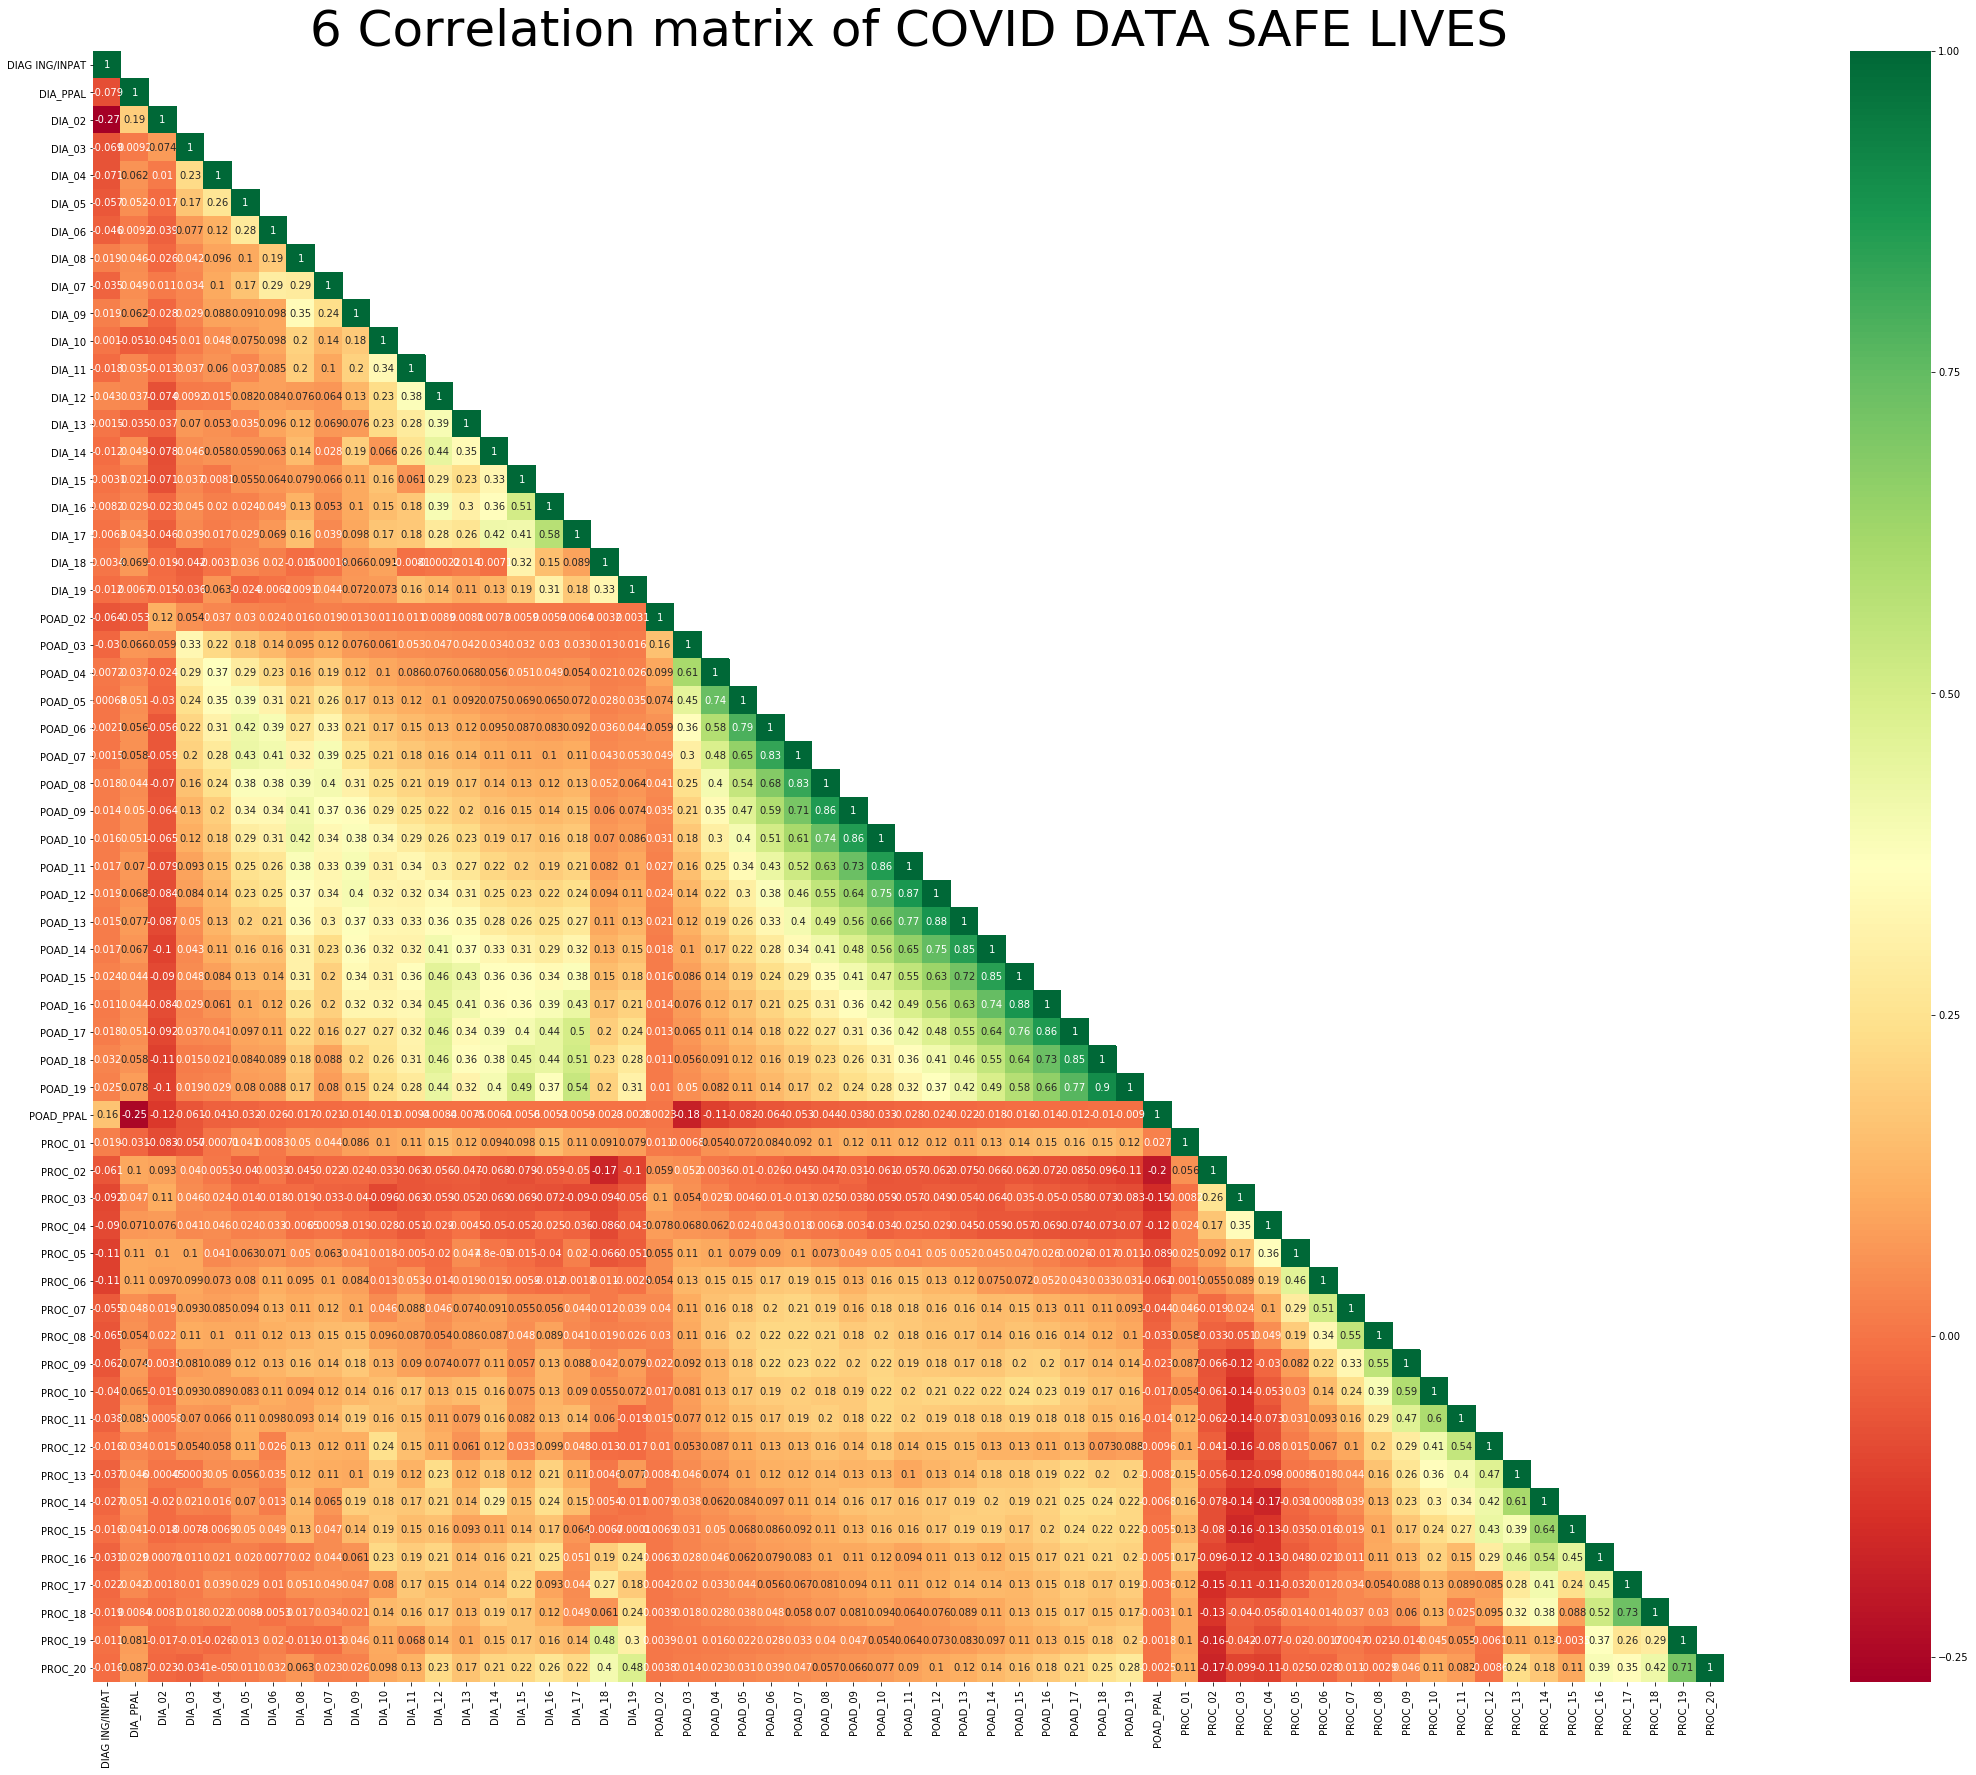

In [33]:
plt.figure(figsize=(45,30))
sns.heatmap(cp.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(cp.corr(), k=1))
plt.title("6 Correlation matrix of COVID DATA SAFE LIVES",fontsize=50)
plt.show()

We see that it has a strong relationship between the last POAD - DAY, and between the POAD variables.

In [34]:
dib.drop('PATIENT ID', inplace=True, axis=1)
dib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 58 columns):
DIA_PPAL     1775 non-null object
DIA_02       1771 non-null object
DIA_03       1634 non-null object
DIA_04       1440 non-null object
DIA_05       1247 non-null object
DIA_06       1057 non-null object
DIA_08       726 non-null object
DIA_07       893 non-null object
DIA_09       603 non-null object
DIA_10       487 non-null object
DIA_11       386 non-null object
DIA_12       311 non-null object
DIA_13       250 non-null object
DIA_14       189 non-null object
DIA_15       140 non-null object
DIA_16       110 non-null object
DIA_17       83 non-null object
DIA_18       61 non-null object
DIA_19       50 non-null object
POAD_02      1771 non-null object
POAD_03      1634 non-null object
POAD_04      1440 non-null object
POAD_05      1247 non-null object
POAD_06      1057 non-null object
POAD_07      893 non-null object
POAD_08      726 non-null object
POAD_09      603 non-null o

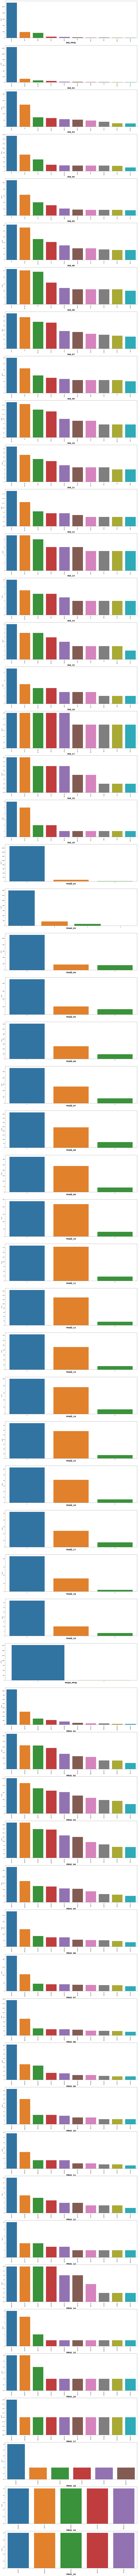

In [35]:
col_numeric = list(dib)
# visualizing the other categorical variables
plt.figure(figsize=(25,500))
for i,col in enumerate(col_numeric, start=1):
    plt.subplot(58,1,i)
    plt.xticks(rotation=90)
    sns.countplot(dib[col],order=dib[col].value_counts().head(10).index)
    plt.xlabel(col, fontsize=20,fontweight="bold")
plt.show()

Hablamos principalmente de los top 3 de cada tabla

###### DIA_PPAL)
'J12.89': 112, Otros tipos de neumonía vírica.
'J18.9': 118, Neumonía, no especificada.
'J98.8': 140, Otros trastornos respiratorios especificados.

###### DIA_02)
'B97.29': 59, Otros coronavirus como causa de enfermedades clasificadas bajo otro concepto.
'R68.89': 262, Other general symptoms and signs.
'Z20.828': 281, Contacto y (sospecha de) exposición a otras enfermedades víricas transmisibles.

###### DIA_03)
'J96.00': 188, Presencia de implante urogenital
'I10': 127, Hipertensión esencial (primaria)
'B97.29': 59, Otros coronavirus como causa de enfermedades clasificadas bajo otro concepto.

###### DIA_04 y DIA_05)
'I10': 127, Hipertensión esencial (primaria)
'E78.5': 102, Hiperlipidemia no especificada
'E11.9': 96, Diabetes mellitus no insulinodependiente, sin mención de complicación

###### DIA_06)
'I10': 127, Hipertensión esencial (primaria)
'E78.5': 102, Hiperlipidemia no especificada
'Z87.891': 302, Personal history of nicotine dependence

###### DIA_07 y DIA_8)
'E78.5': 102, Hiperlipidemia no especificada
'I10': 127, Hipertensión esencial (primaria)
'Z87.891': 302, Personal history of nicotine dependence

###### DIA_09
'Z87.891': 302, Personal history of nicotine dependence
'E78.5': 102, Hiperlipidemia no especificada
'Z79.82': 289, Long term (current) use of aspirin

###### DIA_10
'Z87.891': 302, Personal history of nicotine dependence
'I10': 127, Hipertensión esencial (primaria)
'Z79.82': 289, Long term (current) use of aspirin

###### DIA_11
'Z79.01': 285,

info cie-10 (https://www.icd10data.com/ICD10CM/Codes)

In [36]:
for col_name in cp.columns:
    print(cp[col_name].value_counts(normalize=True).head(10) * 100)

1    90.309859
0     9.690141
Name: DIAG ING/INPAT, dtype: float64
158    63.492958
164    10.704225
196     9.014085
176     2.366197
185     1.802817
168     1.070423
266     0.732394
175     0.676056
226     0.563380
133     0.450704
Name: DIA_PPAL, dtype: float64
59.0     69.859155
262.0     7.042254
281.0     3.774648
158.0     2.704225
164.0     1.183099
188.0     0.957746
196.0     0.901408
127.0     0.732394
240.0     0.450704
95.0      0.450704
Name: DIA_02, dtype: float64
300.0    29.971831
188.0    15.154930
127.0     9.464789
59.0      4.056338
262.0     3.718310
191.0     3.211268
189.0     3.042254
240.0     2.647887
102.0     2.140845
192.0     1.464789
Name: DIA_03, dtype: float64
300.0    52.338028
127.0     8.676056
102.0     4.056338
96.0      2.873239
224.0     1.577465
302.0     1.408451
262.0     1.352113
177.0     1.352113
188.0     1.352113
93.0      1.295775
Name: DIA_04, dtype: float64
300.0    61.915493
127.0     6.028169
102.0     3.549296
96.0      2.253521

Name: PROC_18, dtype: float64
300.0    99.887324
33.0      0.056338
51.0      0.056338
Name: PROC_19, dtype: float64
300.0    99.774648
25.0      0.056338
33.0      0.056338
44.0      0.056338
35.0      0.056338
Name: PROC_20, dtype: float64


In [39]:
izq.stack().value_counts()

B97.29      1356
J12.89      1188
I10          612
E78.5        355
J96.00       334
R68.89       299
Z87.891      267
J18.9        220
E11.9        197
Z79.82       189
J98.8        186
Z90.49       137
Z79.01       117
E03.9        108
Z20.828      106
N40.0        106
Z79.84       106
N17.9        101
K44.9         99
E78.00        78
E66.9         77
J96.01        77
J96.90        77
R09.02        73
E79.0         70
Z59.3         69
J44.0         68
F32.9         67
Z90.710       65
I48.91        60
            ... 
Q21.1          1
K43.2          1
S22.42XA       1
D80.3          1
T80.218A       1
N35.919        1
S82.891A       1
L22            1
C7A.090        1
Z93.0          1
I67.2          1
R53.81         1
Z89.511        1
L97.809        1
S01.102A       1
Z83.511        1
C50.911        1
R44.0          1
C45.0          1
E06.5          1
F20.89         1
R14.0          1
M46.40         1
C55            1
M51.87         1
I21.02         1
T43.295A       1
I82.622       

## Creating Dependent and Independent Variables

In [37]:
cp.applymap(str)
cp.applymap(str).iloc[0,0]
cp = cp.applymap(str)
X = cp.drop(['DIAG ING/INPAT'],axis=1)
test_features = X.columns.to_list()
# dependent variable
y = cp['DIAG ING/INPAT']    

## Splitting data into train test data

In [38]:
# splitting into train and test data
# I will train using 90% of the data to enhanced accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Modelling

## Decision Trees

In [39]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Decision Tree Classifier Training Accuracy:', score,'%')

Decision Tree Classifier Training Accuracy: 83.14606741573034 %


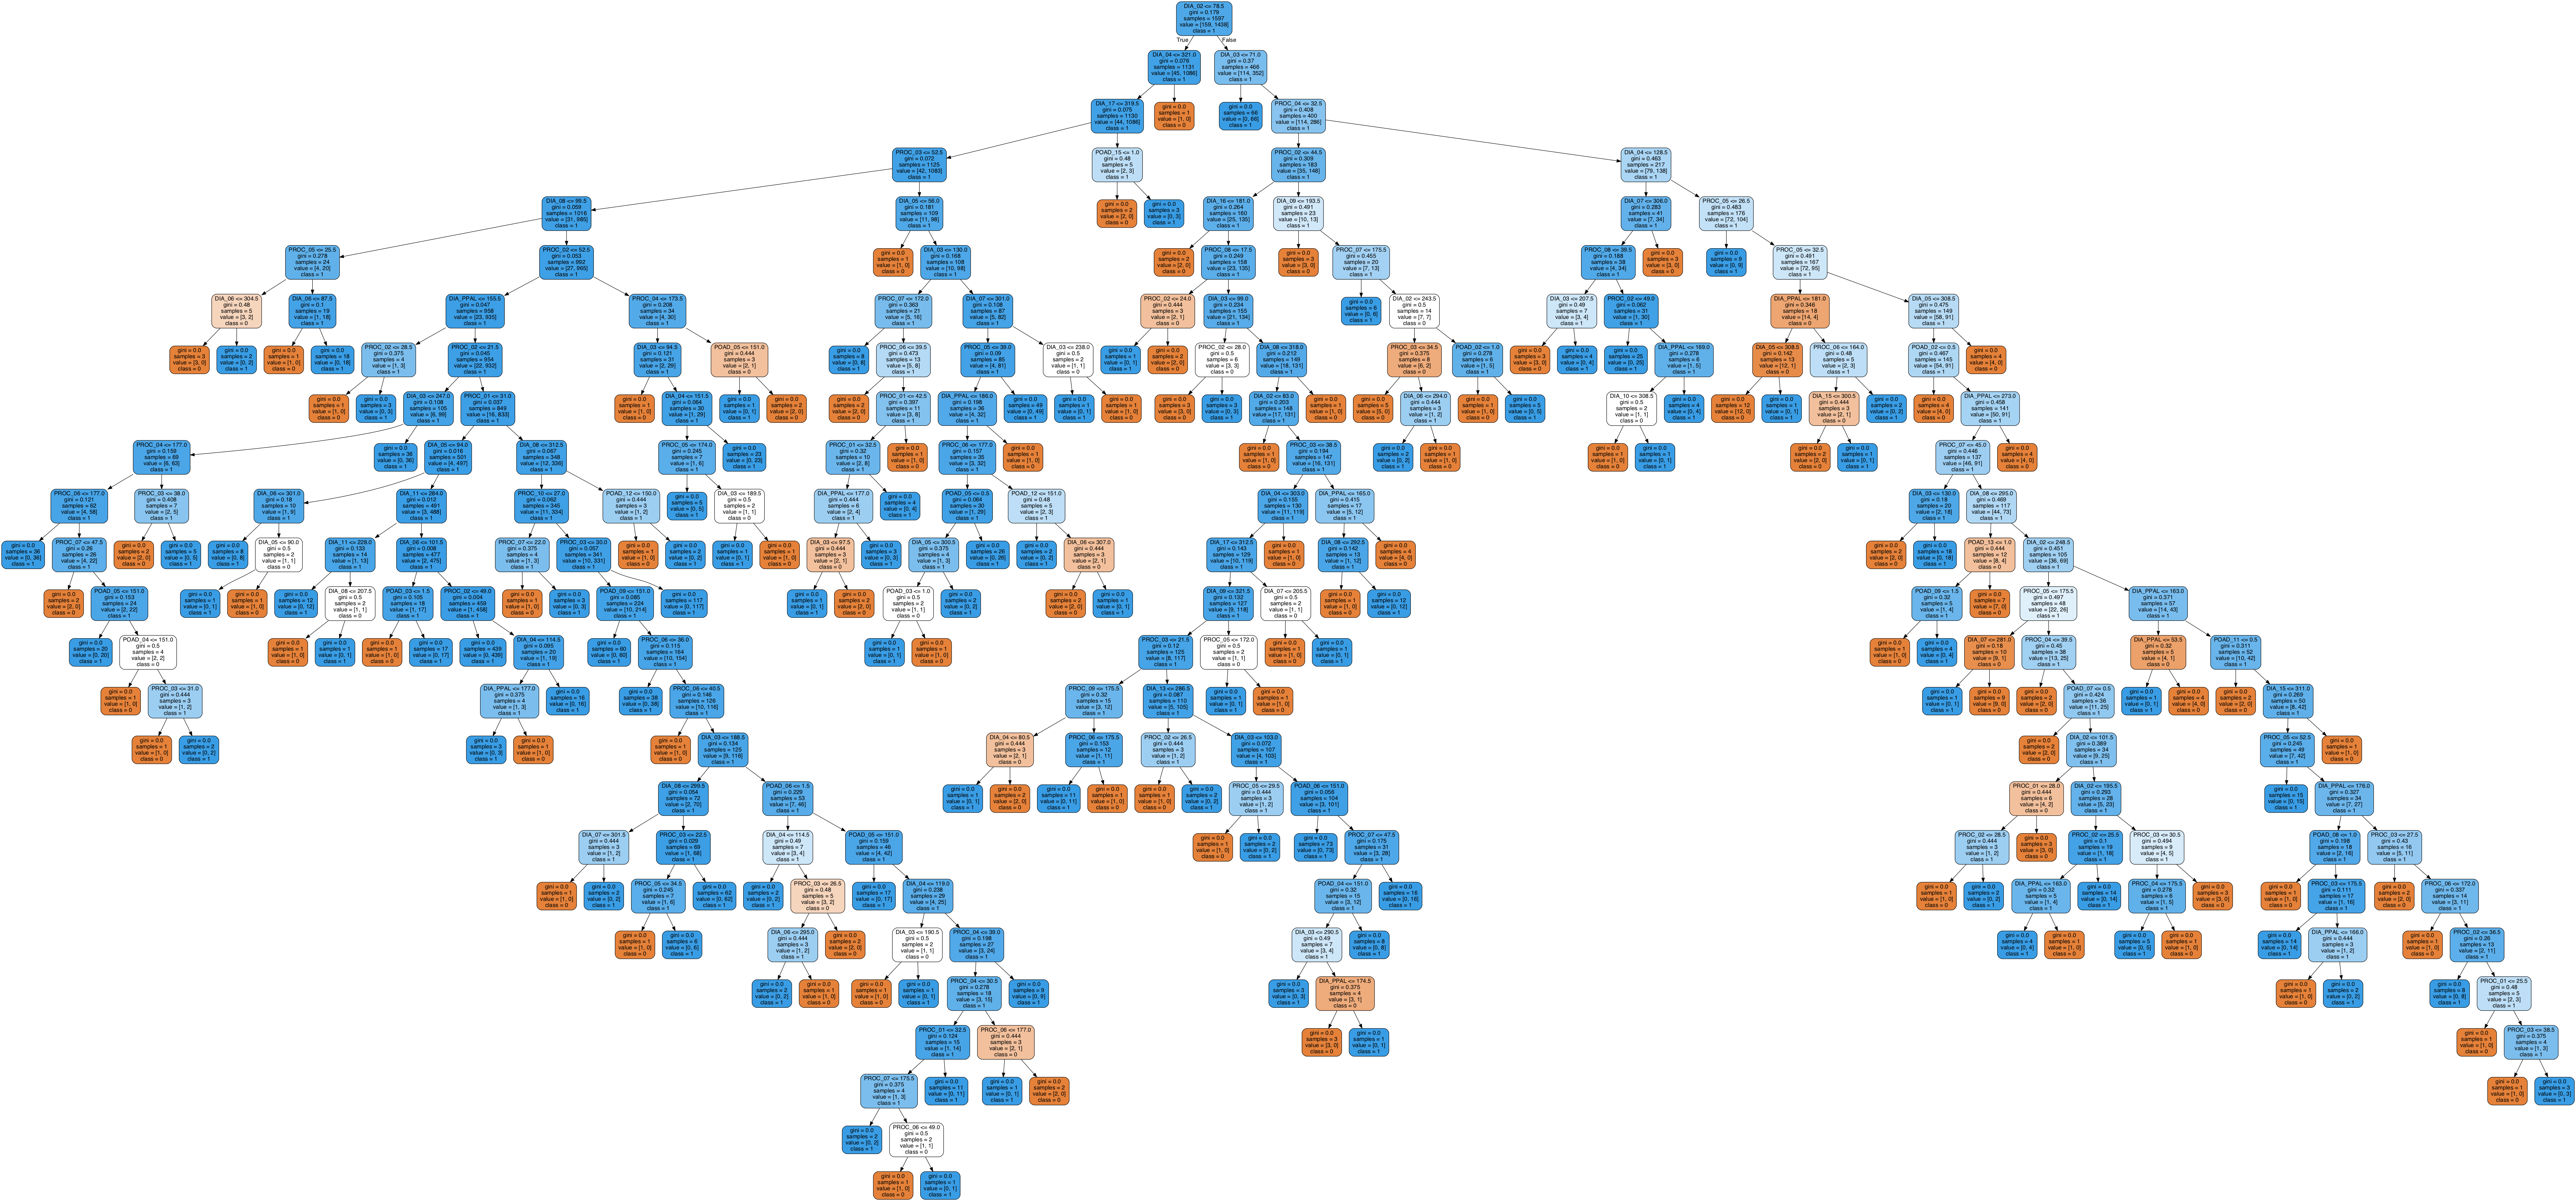

In [40]:
tree.export_graphviz(model, out_file = '5covid_decisiontree.dot')
dotfile = StringIO()
tree.export_graphviz(model, out_file=dotfile,filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all')
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png('5covid_tree.png')
Image(graph.create_png())

## Random Forest Classifier

In [41]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Random Forest Classifier Training Accuracy:', score,'%')

Random Forest Classifier Training Accuracy: 92.69662921348315 %


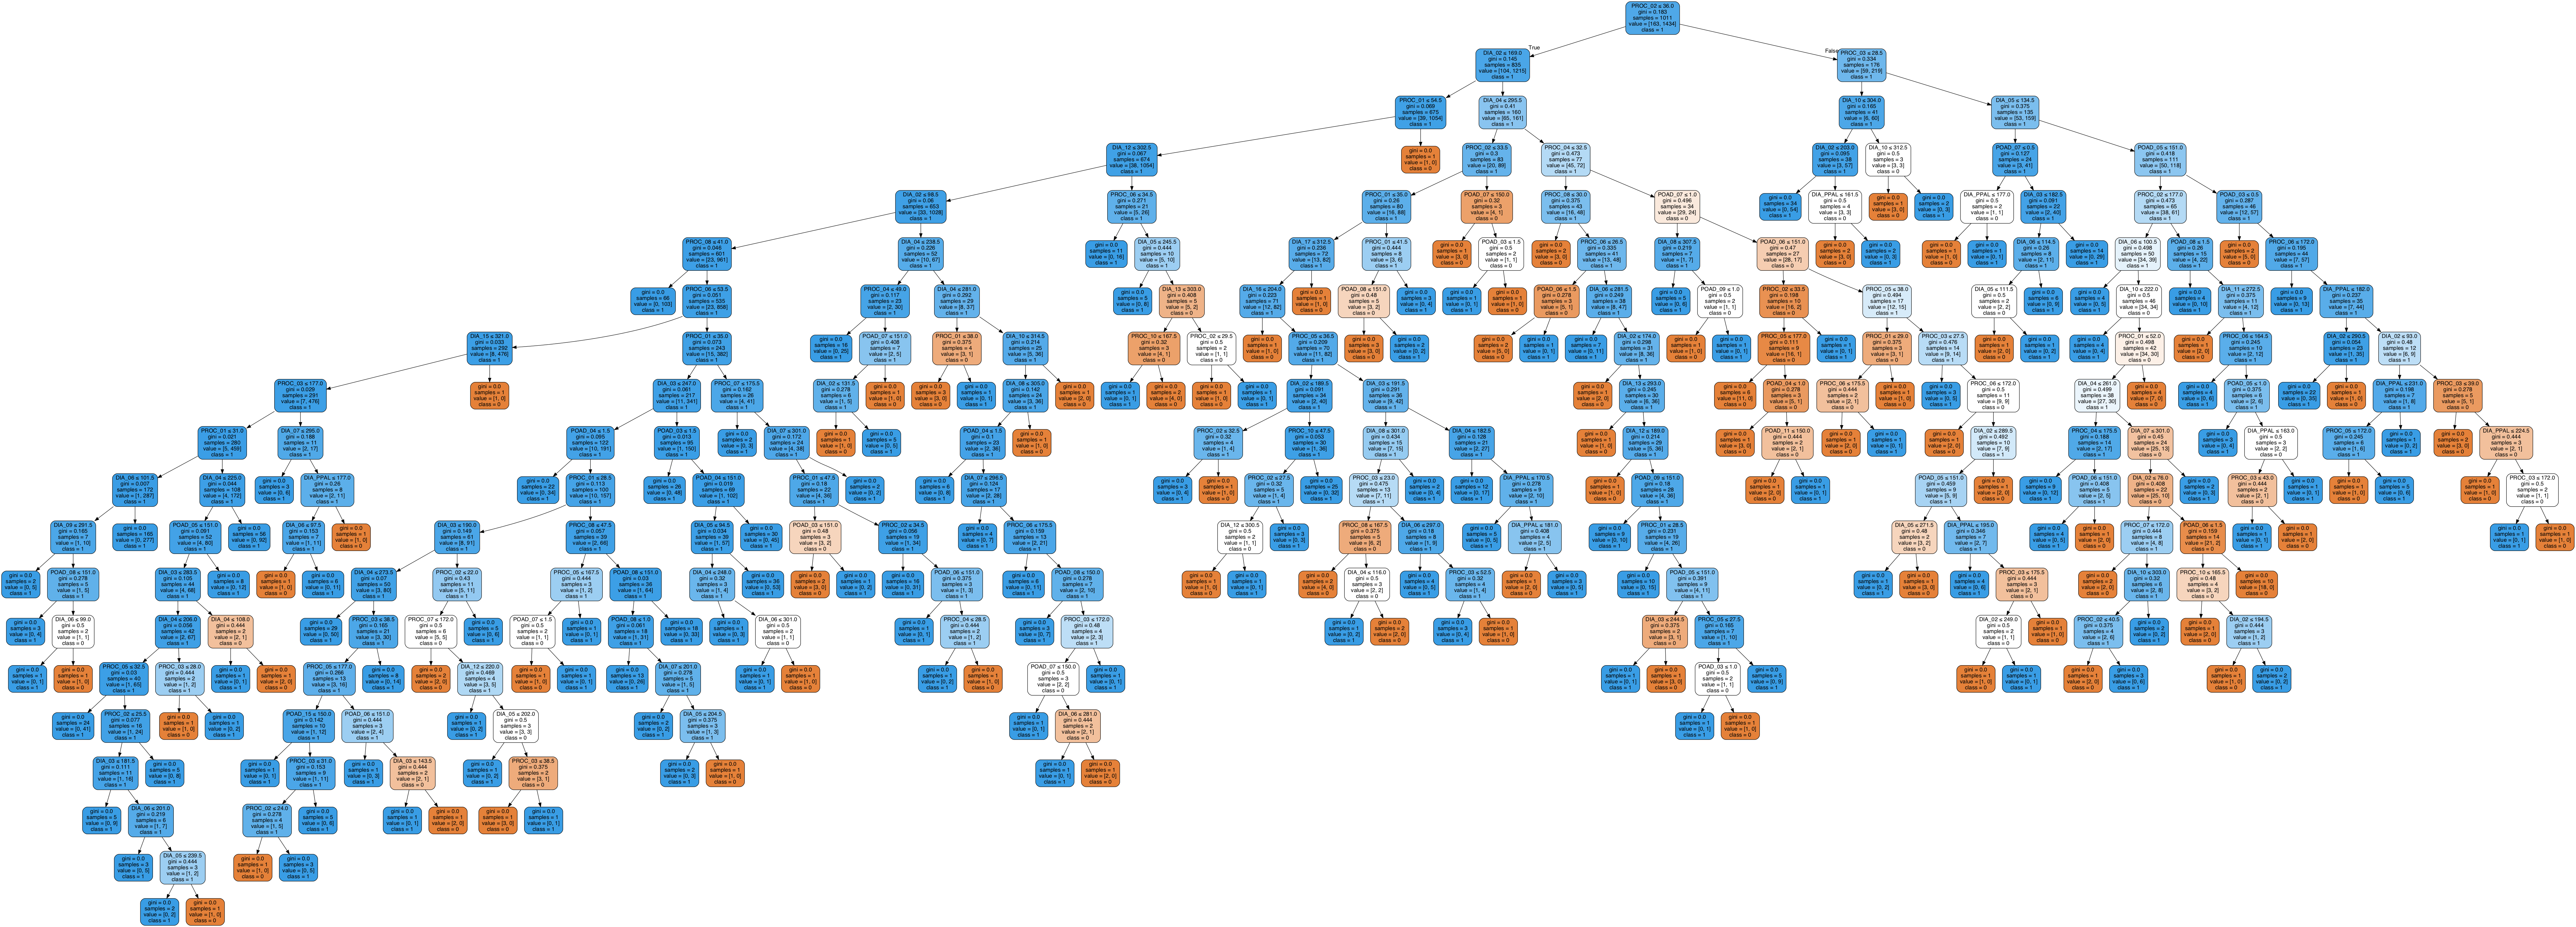

In [42]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all', special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('5covid_forest.png')
Image(graph.create_png())